# TMDb Movie prediction

### Under the supervision of Dr Hazem Youssef.

<img src="https://img5.goodfon.com/wallpaper/nbig/c/af/sssssss-aaaaaaaaaaa-ddddddddd-fffffffff-rrrrrrr.jpg"> 

***
# Introduction
***
This data set contains information about 10,000 movies collected from The
Movie Database (TMDb), including user ratings and revenue.

- Certain columns, like ‘cast’ and ‘genres’, contain multiple values
separated by pipe (|) characters.  
-  The final two columns ending with “_adj” show the budget and revenue of
the associated movie in terms of 2010 dollars, accounting for inflation over
time.

***
# Objectives
***
1- Filter and clean the columns and rows (Remove unnecessary
columns & rows, Deal with NaN values with proper imputation
techniques , remove duplicate records , apply feature scaling
(normalization) for variables if necessary , Convert the used
categorical columns to numerical columns using One hot encoding
and label encoding techniques , check also that all columns have
proper datatypes) In order to make them tidy and be able to be fed
the columns into a linear regression model.

2- Fed the data after filtering them into a linear or polynomial regression
model where we will use all our selected columns as our X variables
and we will use our Y variable the net profit which is the difference
between (revenue_adj – budget_adj).

***
# Data wrangling
***

### Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mp 
import seaborn as sns
import category_encoders as ce
from sklearn import linear_model
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import LabelEncoder
from sklearn import datasets, linear_model, metrics

### Reading data from the main csv file

In [2]:
df = pd.read_csv('tmdb-movies.csv')

### Displaying the first five rows of the dataset

In [3]:
df.head()

,id,imdb_id,popularity,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,6.5,2015,137999939.3,1.392446e+09
1,76341,tt1392190,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/2015,6185,7.1,2015,137999939.3,3.481613e+08
2,262500,tt2908446,13.112507,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/2015,2480,6.3,2015,101199955.5,2.716190e+08
3,140607,tt2488496,11.173104,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/2015,5292,7.5,2015,183999919.0,1.902723e+09
4,168259,tt2820852,9.335014,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/2015,2947,7.3,2015,174799923.1,1.385749e+09


In [4]:
df.shape

(10866, 19)

## Formatting

#### Rounding up float numbers in order to have a better preview on the data, especially in order to normalize both budget_adj and revenue_adj columns' values.

In [5]:
pd.set_option('display.float_format', lambda x: '%.1f' % x)
df.head()

,id,imdb_id,popularity,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,33.0,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,6.5,2015,137999939.3,1392445893.0
1,76341,tt1392190,28.4,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/2015,6185,7.1,2015,137999939.3,348161292.5
2,262500,tt2908446,13.1,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/2015,2480,6.3,2015,101199955.5,271619025.4
3,140607,tt2488496,11.2,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/2015,5292,7.5,2015,183999919.0,1902723130.0
4,168259,tt2820852,9.3,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/2015,2947,7.3,2015,174799923.1,1385748801.0


#### Remove rows with zero values in budget and revenue columns and replace them with their respecting mean

In [6]:
countRev = (df['revenue_adj'] == 0).sum()
countBug = (df['budget_adj'] == 0).sum()
print(countRev)
print(countBug)

6016
5696


In [7]:
print("Revenue mean: " + str(df['revenue_adj'].mean()))
print("Budget mean:" + str(df['budget_adj'].mean()))

Revenue mean: 51364363.253164716
Budget mean:17551039.82290045


In [8]:
df['revenue_adj'].replace(to_replace=0,value=df['revenue_adj'].mean(),inplace=True)
df['budget_adj'].replace(to_replace=0,value=df['budget_adj'].mean(),inplace=True)

In [9]:
countRev = (df['revenue_adj'] == 0).sum()
countBug = (df['budget_adj'] == 0 ).sum()
print(countRev)
print(countBug)

0
0


#### converting release_date from object to datetime

In [10]:
df['release_date'] = pd.to_datetime(df['release_date'])

#### Adding a new column "profit_adj"

In [11]:
df["profit_adj"]=df["revenue_adj"]-df["budget_adj"]
df.head()

,id,imdb_id,popularity,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit_adj
0,135397,tt0369610,33.0,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,137999939.3,1392445893.0,1254445953.7
1,76341,tt1392190,28.4,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,137999939.3,348161292.5,210161353.2
2,262500,tt2908446,13.1,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,101199955.5,271619025.4,170419069.9
3,140607,tt2488496,11.2,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,183999919.0,1902723130.0,1718723211.0
4,168259,tt2820852,9.3,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,174799923.1,1385748801.0,1210948877.9


#### Check for correlation between categorical columns and the profit.

In [12]:
def binaryEncoding(column):
    encoder= ce.BinaryEncoder(cols=[column],return_df=True)
    data_encoded=encoder.fit_transform(df) 
    data_encoded[column]=data_encoded["revenue_adj"]-data_encoded["budget_adj"]
    ccc=data_encoded.corr()
    print(ccc["profit_adj"])

In [13]:
binaryEncoding("cast")

id             -0.1
popularity      0.5
cast_0          0.0
cast_1         -0.0
cast_2         -0.0
cast_3          0.0
cast_4         -0.0
cast_5          0.0
cast_6         -0.1
cast_7          0.0
cast_8          0.0
cast_9          0.0
cast_10        -0.0
cast_11        -0.0
cast_12        -0.0
cast_13         0.0
runtime         0.1
vote_count      0.6
vote_average    0.2
release_year   -0.1
budget_adj      0.4
revenue_adj     1.0
profit_adj      1.0
cast            1.0
Name: profit_adj, dtype: float64


In [14]:
binaryEncoding("director")

id             -0.1
popularity      0.5
director_0     -0.0
director_1     -0.1
director_2      0.0
director_3     -0.0
director_4     -0.1
director_5     -0.0
director_6     -0.0
director_7     -0.0
director_8      0.0
director_9      0.0
director_10    -0.0
director_11     0.0
director_12     0.0
runtime         0.1
vote_count      0.6
vote_average    0.2
release_year   -0.1
budget_adj      0.4
revenue_adj     1.0
profit_adj      1.0
director        1.0
Name: profit_adj, dtype: float64


In [15]:
binaryEncoding("production_companies")

id                        -0.1
popularity                 0.5
runtime                    0.1
production_companies_0    -0.0
production_companies_1     0.0
production_companies_2     0.0
production_companies_3     0.0
production_companies_4    -0.0
production_companies_5    -0.1
production_companies_6    -0.0
production_companies_7     0.0
production_companies_8     0.0
production_companies_9    -0.0
production_companies_10   -0.0
production_companies_11    0.0
production_companies_12    0.0
vote_count                 0.6
vote_average               0.2
release_year              -0.1
budget_adj                 0.4
revenue_adj                1.0
profit_adj                 1.0
production_companies       1.0
Name: profit_adj, dtype: float64


We found that the 3 columns (cast, director, prodcution_companies) are insignificant

In [16]:
binaryEncoding("genres")

id             -0.1
popularity      0.5
runtime         0.1
genres_0        0.0
genres_1        0.0
genres_2        0.1
genres_3        0.0
genres_4        0.0
genres_5       -0.0
genres_6       -0.0
genres_7       -0.0
genres_8        0.1
genres_9        0.0
genres_10       0.0
vote_count      0.6
vote_average    0.2
release_year   -0.1
budget_adj      0.4
revenue_adj     1.0
profit_adj      1.0
genres          1.0
Name: profit_adj, dtype: float64


In [17]:
df = pd.concat([df.drop('genres', 1), df['genres'].str.get_dummies(sep="|")], 1)
df.head()

C:\Users\SIGMA\AppData\Local\Temp/ipykernel_12944/616327294.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df = pd.concat([df.drop('genres', 1), df['genres'].str.get_dummies(sep="|")], 1)
C:\Users\SIGMA\AppData\Local\Temp/ipykernel_12944/616327294.py:1: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  df = pd.concat([df.drop('genres', 1), df['genres'].str.get_dummies(sep="|")], 1)


,id,imdb_id,popularity,original_title,cast,homepage,director,tagline,keywords,overview,...,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,135397,tt0369610,33.0,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,...,0,0,0,0,0,1,0,1,0,0
1,76341,tt1392190,28.4,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,...,0,0,0,0,0,1,0,1,0,0
2,262500,tt2908446,13.1,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,...,0,0,0,0,0,1,0,1,0,0
3,140607,tt2488496,11.2,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,...,0,0,0,0,0,1,0,0,0,0
4,168259,tt2820852,9.3,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Tor...,...,0,0,0,0,0,0,0,1,0,0


In [18]:
correlations_genres = df.corr()
print(correlations_genres['profit_adj'])

id                -0.1
popularity         0.5
runtime            0.1
vote_count         0.6
vote_average       0.2
release_year      -0.1
budget_adj         0.4
revenue_adj        1.0
profit_adj         1.0
Action             0.1
Adventure          0.2
Animation          0.1
Comedy            -0.0
Crime             -0.0
Documentary       -0.0
Drama             -0.1
Family             0.1
Fantasy            0.1
Foreign           -0.0
History           -0.0
Horror            -0.0
Music             -0.0
Mystery           -0.0
Romance           -0.0
Science Fiction    0.1
TV Movie          -0.0
Thriller           0.0
War                0.0
Western           -0.0
Name: profit_adj, dtype: float64


There's somehow a little correlation between genres and profit, so we will use it while building our model.

## Dropping rows and columns.

Columns to be dropped: 
- **homepage, id, imdb_id**: they are unique to each movie.
- **tagline, cast, director**: serves little to no importance, in addition to having a HUGE number of null values.
- **release_date**: we will use the "release_year" as a more general approach instead.
- **budget_adj, revenue_adj**: we need to calculate the profit from them, after that they serve no purpose.

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    10866 non-null  int64         
 1   imdb_id               10856 non-null  object        
 2   popularity            10866 non-null  float64       
 3   original_title        10866 non-null  object        
 4   cast                  10790 non-null  object        
 5   homepage              2936 non-null   object        
 6   director              10822 non-null  object        
 7   tagline               8042 non-null   object        
 8   keywords              9373 non-null   object        
 9   overview              10862 non-null  object        
 10  runtime               10866 non-null  int64         
 11  production_companies  9836 non-null   object        
 12  release_date          10866 non-null  datetime64[ns]
 13  vote_count      

In [20]:
colsToBeDropped=["imdb_id","homepage","keywords","id","director","production_companies","budget_adj","revenue_adj","cast","tagline","overview","release_date"]
df.drop(colsToBeDropped,inplace=True,axis=1)
print("First 5 rows after dropping the columns")
df.head()

First 5 rows after dropping the columns


,popularity,original_title,runtime,vote_count,vote_average,release_year,profit_adj,Action,Adventure,Animation,...,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,33.0,Jurassic World,124,5562,6.5,2015,1254445953.7,1,1,0,...,0,0,0,0,0,1,0,1,0,0
1,28.4,Mad Max: Fury Road,120,6185,7.1,2015,210161353.2,1,1,0,...,0,0,0,0,0,1,0,1,0,0
2,13.1,Insurgent,119,2480,6.3,2015,170419069.9,0,1,0,...,0,0,0,0,0,1,0,1,0,0
3,11.2,Star Wars: The Force Awakens,136,5292,7.5,2015,1718723211.0,1,1,0,...,0,0,0,0,0,1,0,0,0,0
4,9.3,Furious 7,137,2947,7.3,2015,1210948877.9,1,0,0,...,0,0,0,0,0,0,0,1,0,0


#### Dropping rows with duplicate titles & null values.

In [21]:
df.shape

(10866, 27)

In [22]:
df=df.drop_duplicates(subset=['original_title'])

In [23]:
df.isnull().sum()

popularity         0
original_title     0
runtime            0
vote_count         0
vote_average       0
release_year       0
profit_adj         0
Action             0
Adventure          0
Animation          0
Comedy             0
Crime              0
Documentary        0
Drama              0
Family             0
Fantasy            0
Foreign            0
History            0
Horror             0
Music              0
Mystery            0
Romance            0
Science Fiction    0
TV Movie           0
Thriller           0
War                0
Western            0
dtype: int64

In [24]:
df.shape

(10571, 27)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10571 entries, 0 to 10865
Data columns (total 27 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   popularity       10571 non-null  float64
 1   original_title   10571 non-null  object 
 2   runtime          10571 non-null  int64  
 3   vote_count       10571 non-null  int64  
 4   vote_average     10571 non-null  float64
 5   release_year     10571 non-null  int64  
 6   profit_adj       10571 non-null  float64
 7   Action           10571 non-null  int64  
 8   Adventure        10571 non-null  int64  
 9   Animation        10571 non-null  int64  
 10  Comedy           10571 non-null  int64  
 11  Crime            10571 non-null  int64  
 12  Documentary      10571 non-null  int64  
 13  Drama            10571 non-null  int64  
 14  Family           10571 non-null  int64  
 15  Fantasy          10571 non-null  int64  
 16  Foreign          10571 non-null  int64  
 17  History     

***
## Exploratory Data Analysis
***

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10571 entries, 0 to 10865
Data columns (total 26 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   popularity       10571 non-null  float64
 1   runtime          10571 non-null  int64  
 2   vote_count       10571 non-null  int64  
 3   vote_average     10571 non-null  float64
 4   release_year     10571 non-null  int64  
 5   Action           10571 non-null  int64  
 6   Adventure        10571 non-null  int64  
 7   Animation        10571 non-null  int64  
 8   Comedy           10571 non-null  int64  
 9   Crime            10571 non-null  int64  
 10  Documentary      10571 non-null  int64  
 11  Drama            10571 non-null  int64  
 12  Family           10571 non-null  int64  
 13  Fantasy          10571 non-null  int64  
 14  Foreign          10571 non-null  int64  
 15  History          10571 non-null  int64  
 16  Horror           10571 non-null  int64  
 17  Music       

In [26]:
def find_maxmin(p):
    max_id = df[p].idxmax()
    min_id = df[p].idxmin()
    high_df = pd.DataFrame(df.loc[max_id,:])
    low_df = pd.DataFrame(df.loc[min_id,:])
    print('The movie with highest '+p +' is: ',df['original_title'][max_id])
    print('The movie with lowest '+ p+' is:' , df['original_title'][min_id])
    return pd.concat([high_df, low_df], axis=1)


### Question 1: Which movie has the highest profit? and which one has the lowest profit?

In [27]:
find_maxmin('profit_adj')

The movie with highest profit_adj is:  Star Wars
The movie with lowest profit_adj is: The Warrior's Way


,1329,2244
popularity,12.0,0.3
original_title,Star Wars,The Warrior's Way
runtime,121,100
vote_count,4428,74
vote_average,7.9,6.4
release_year,1977,2010
profit_adj,2750136650.6,-413912431.0
Action,1,1
Adventure,1,1
Animation,0,0


<br>

### Question 2: How is the progression of movies production over the years?

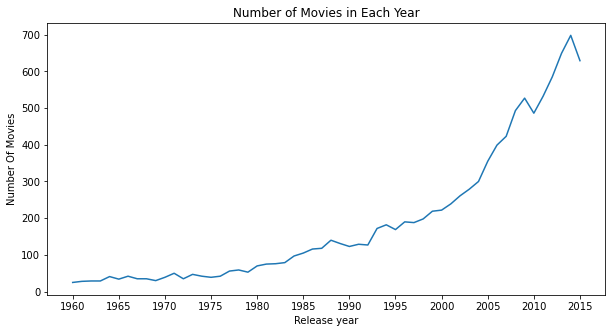

In [28]:
df.groupby('release_year').count()['original_title'].plot(xticks = np.arange(1960,2016,5), figsize=(10,5))
mp.title('Number of Movies in Each Year')
mp.xlabel('Release year')
mp.ylabel('Number Of Movies');

<br>

### Question 3: To what extent can runtime affect a movie's popularity?

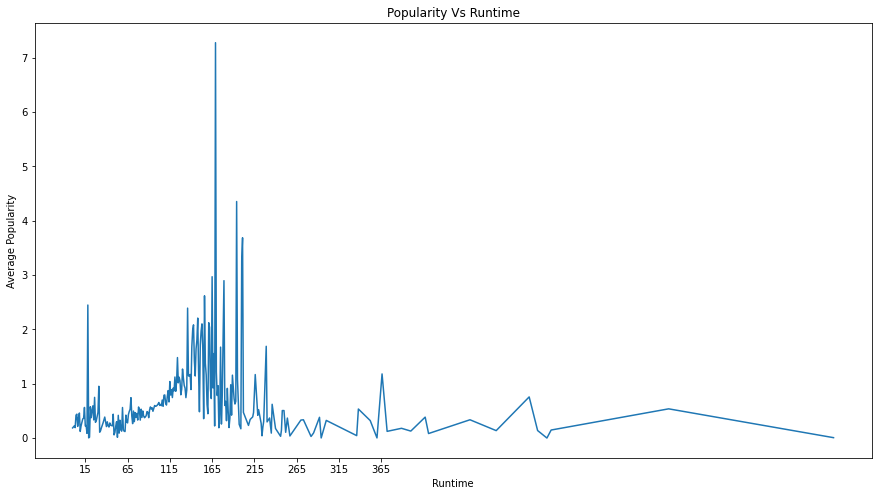

In [29]:
df.groupby('runtime').mean()['popularity'].plot(xticks=np.arange(15,400,50), figsize=(15,8))
mp.title('Popularity Vs Runtime')
mp.xlabel('Runtime')
mp.ylabel('Average Popularity');

***
## Prediction
***

In [30]:
temp = df['profit_adj']
df.drop('profit_adj',inplace=True,axis=1)
df=df.join(temp)

In [31]:
df.head()

,popularity,original_title,runtime,vote_count,vote_average,release_year,Action,Adventure,Animation,Comedy,...,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western,profit_adj
0,33.0,Jurassic World,124,5562,6.5,2015,1,1,0,0,...,0,0,0,0,1,0,1,0,0,1254445953.7
1,28.4,Mad Max: Fury Road,120,6185,7.1,2015,1,1,0,0,...,0,0,0,0,1,0,1,0,0,210161353.2
2,13.1,Insurgent,119,2480,6.3,2015,0,1,0,0,...,0,0,0,0,1,0,1,0,0,170419069.9
3,11.2,Star Wars: The Force Awakens,136,5292,7.5,2015,1,1,0,0,...,0,0,0,0,1,0,0,0,0,1718723211.0
4,9.3,Furious 7,137,2947,7.3,2015,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1210948877.9


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10571 entries, 0 to 10865
Data columns (total 27 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   popularity       10571 non-null  float64
 1   original_title   10571 non-null  object 
 2   runtime          10571 non-null  int64  
 3   vote_count       10571 non-null  int64  
 4   vote_average     10571 non-null  float64
 5   release_year     10571 non-null  int64  
 6   Action           10571 non-null  int64  
 7   Adventure        10571 non-null  int64  
 8   Animation        10571 non-null  int64  
 9   Comedy           10571 non-null  int64  
 10  Crime            10571 non-null  int64  
 11  Documentary      10571 non-null  int64  
 12  Drama            10571 non-null  int64  
 13  Family           10571 non-null  int64  
 14  Fantasy          10571 non-null  int64  
 15  Foreign          10571 non-null  int64  
 16  History          10571 non-null  int64  
 17  Horror      

In [33]:
df.drop('original_title',axis=1,inplace=True)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10571 entries, 0 to 10865
Data columns (total 26 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   popularity       10571 non-null  float64
 1   runtime          10571 non-null  int64  
 2   vote_count       10571 non-null  int64  
 3   vote_average     10571 non-null  float64
 4   release_year     10571 non-null  int64  
 5   Action           10571 non-null  int64  
 6   Adventure        10571 non-null  int64  
 7   Animation        10571 non-null  int64  
 8   Comedy           10571 non-null  int64  
 9   Crime            10571 non-null  int64  
 10  Documentary      10571 non-null  int64  
 11  Drama            10571 non-null  int64  
 12  Family           10571 non-null  int64  
 13  Fantasy          10571 non-null  int64  
 14  Foreign          10571 non-null  int64  
 15  History          10571 non-null  int64  
 16  Horror           10571 non-null  int64  
 17  Music       

In [35]:
X=df.iloc[:,1:25]
Y=df['profit_adj']

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.30)

In [37]:
poly_features = PolynomialFeatures(degree=3)

X_train_poly = poly_features.fit_transform(X_train)

poly_model = linear_model.LinearRegression()

poly_model.fit(X_train_poly, y_train)

y_train_predicted = poly_model.predict(X_train_poly)

prediction = poly_model.predict(poly_features.fit_transform(X_test))

In [38]:
poly_model.score(X_train_poly, y_train)

0.789956570495318

In [39]:
metrics.mean_squared_error(np.asarray(y_test), prediction)

1.6142692969307016e+18

In [40]:
poly_model.intercept_

-7967623334919.033